# Exercise Set 9


## Mohaddeseh Mozaffari

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
sns.set()

# Q1:

In [10]:
Mu = np.linspace(0, 4, 100)
M = 500
N = 1000

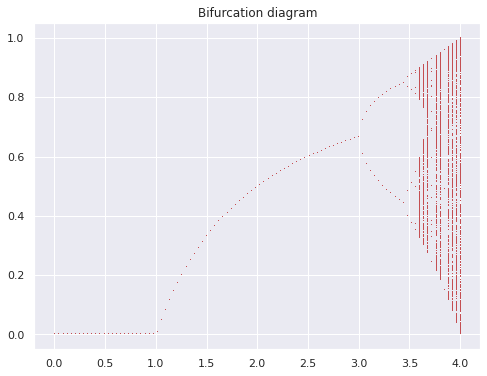

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
for mu in Mu:
    for m in range(M):
        x = np.random.random()
        for n in range(N):
            x = x*mu*(1-x)
        ax.plot(mu, x, ',r', alpha=1)
ax.set_title("Bifurcation diagram")
plt.show()

# Q2:

In [81]:
w0 = 1
a = 0.2
f = 0.52
w = 0.666
dt = 0.01
T = np.arange(0, 1000, dt)
x0 = [0,0]

In [82]:
def theta2(x,t, w0, a, f, w):
    return (x[1], -(w0**2)*np.sin(x[0])- a*x[1]+f*np.cos(w*t))

In [83]:
sol = odeint(theta2, x0, T, args=(w0, a, f, w))

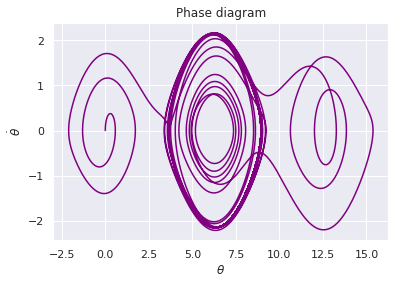

In [84]:
plt.plot(sol[:, 0], sol[:, 1], color="purple")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.title("Phase diagram")
plt.show()

In [97]:
F = np.linspace(0, 2, 100)

In [107]:
theta_dot = []
for ff in F:
    sol = odeint(theta2, x0, T, args=(w0, a, ff, w))
    theta_dot.append(abs(sol[1000, 1]))

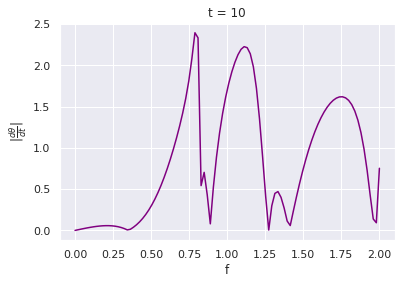

In [109]:
plt.plot(F, theta_dot, color="purple")
plt.xlabel("f")
plt.ylabel(r"$|\frac{d\theta}{dt}|$")
plt.title("t = 10")
plt.show()

# Q3:

In [20]:
def f(x, t):
    dxdt = 10*(x[1] - x[0])
    dydt = -x[0]*x[2] + 28*x[0] - x[1]
    dzdt = x[0]*x[1] - (8/3)*x[2]
    return np.array([dxdt, dydt, dzdt])

In [21]:
t = np.linspace(0, 100, 1000)
x0 = np.array([1, 1, 1])

In [24]:
sol = odeint(f, x0, t)
X = sol[:, 0]
Y = sol[:, 1]
Z = sol[:, 2]

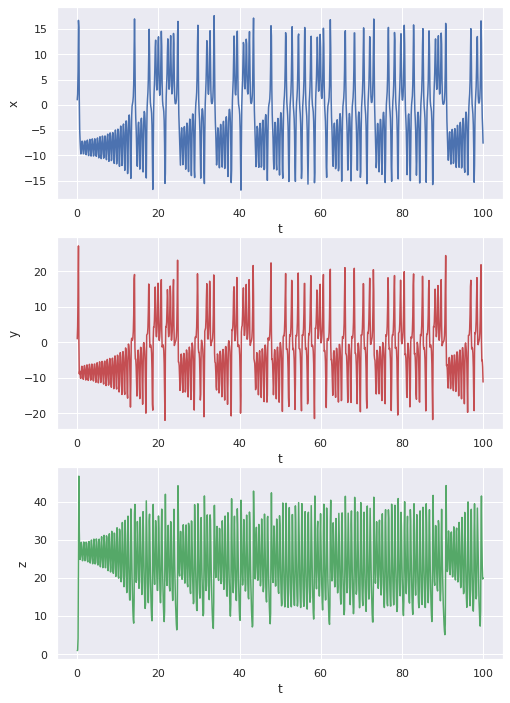

In [25]:
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
ax[0].plot(t, X, 'b')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x')
ax[1].plot(t, Y, 'r')
ax[1].set_xlabel('t')
ax[1].set_ylabel('y')
ax[2].plot(t, Z, 'g')
ax[2].set_xlabel('t')
ax[2].set_ylabel('z')
plt.show()

In [31]:
dxdt = 10*(Y - X)
dydt = -X*Z + 28*X - Y
dzdt = X*Y - (8/3)*Z

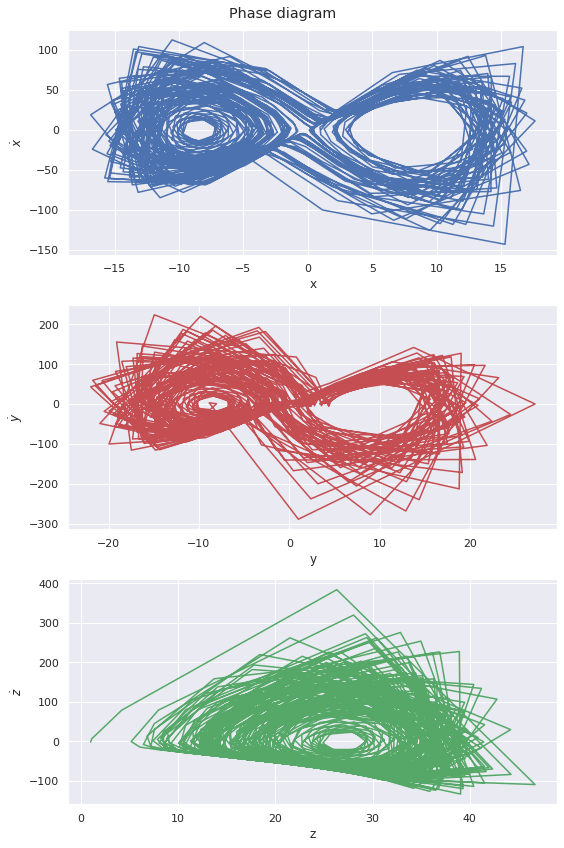

In [36]:
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
ax[0].plot(X, dxdt, 'b')
ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$\dot{x}$')

ax[1].plot(Y, dydt , 'r')
ax[1].set_xlabel('y')
ax[1].set_ylabel(r'$\dot{y}$')

ax[2].plot(Z, dzdt, 'g')
ax[2].set_xlabel('z')
ax[2].set_ylabel(r'$\dot{z}$')

plt.suptitle("Phase diagram")
plt.tight_layout()
plt.show()

# Q5:

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic map
def logistic_map(x, mu):
    return mu*x*(1 - x)

# Define the function to compute the Lyapunov exponent
def lyapunov_exponent(mu, x0, eps=1e-10, N=10000):
    # Compute the trajectory of the map for the initial condition x0
    x = np.zeros(N)
    x[0] = x0
    for n in range(1, N):
        x[n] = logistic_map(x[n-1], mu)

    # Choose a second initial condition close to x0
    x_prime = x0 + eps

    # Compute the trajectory of the map for the second initial condition
    x_p = np.zeros(N)
    x_p[0] = x_prime
    for n in range(1, N):
        x_p[n] = logistic_map(x_p[n-1], mu)

    # Compute the Euclidean distance between the two trajectories at each time step
    d = np.sqrt(np.sum((x - x_p)**2, axis=1))

    # Compute the logarithmic rate of separation of the two trajectories
    l = np.mean(np.log(d[1:]/d[:-1]))

    return l

# Set the range of mu values to compute the Lyapunov exponent for
mu_vals = np.linspace(2.5, 4.0, 1000)

# Set the initial condition for the map
x0 = 0.1

# Compute the Lyapunov exponent for each mu value
lyap_vals = np.zeros(len(mu_vals))
for i in range(len(mu_vals)):
    lyap_vals[i] = lyapunov_exponent(mu_vals[i], x0)

# Plot the Lyapunov exponent as a function of mu
fig, ax = plt.subplots()
ax.plot(mu_vals, lyap_vals, 'k')
ax.set_xlabel('mu')
ax.set_ylabel('Lyapunov exponent')
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 1